In [1]:
#Import necessary models
import numpy as np
import pandas as pd
import pandas
# Ploting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Regression
import statsmodels.api as sm
from __future__ import print_function
from patsy import dmatrices
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pydotplus
#logistic
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from patsy import dmatrices

import scipy.stats 
import random

import plotly.plotly as py
import plotly.graph_objs as go


import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import skew

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.gridspec as gridspec



In [2]:
train = pd.read_csv('house+price_train.csv')
test = pd.read_csv('houseprices_test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
print ("Total rows and columns in train dataset respectively: " + str(train.shape))
print ("Total rows and columns in test dataset respectively: " + str(test.shape))

Total rows and columns in train dataset respectively: (1460, 81)
Total rows and columns in test dataset respectively: (1459, 80)


In [8]:
#statistical summary
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [9]:
#datatype counts
train.get_dtype_counts()

float64     3
int64      35
object     43
dtype: int64

There are multiple types of features.
Some features having missing values also.
Most of the features are object(includeing string values in the variable).
we should target to the variable i.e SalePrice. Plot histogram to see if the SalePrice feature is normally distributed. In order to create any linear model it is important that the features are normally distributed.

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



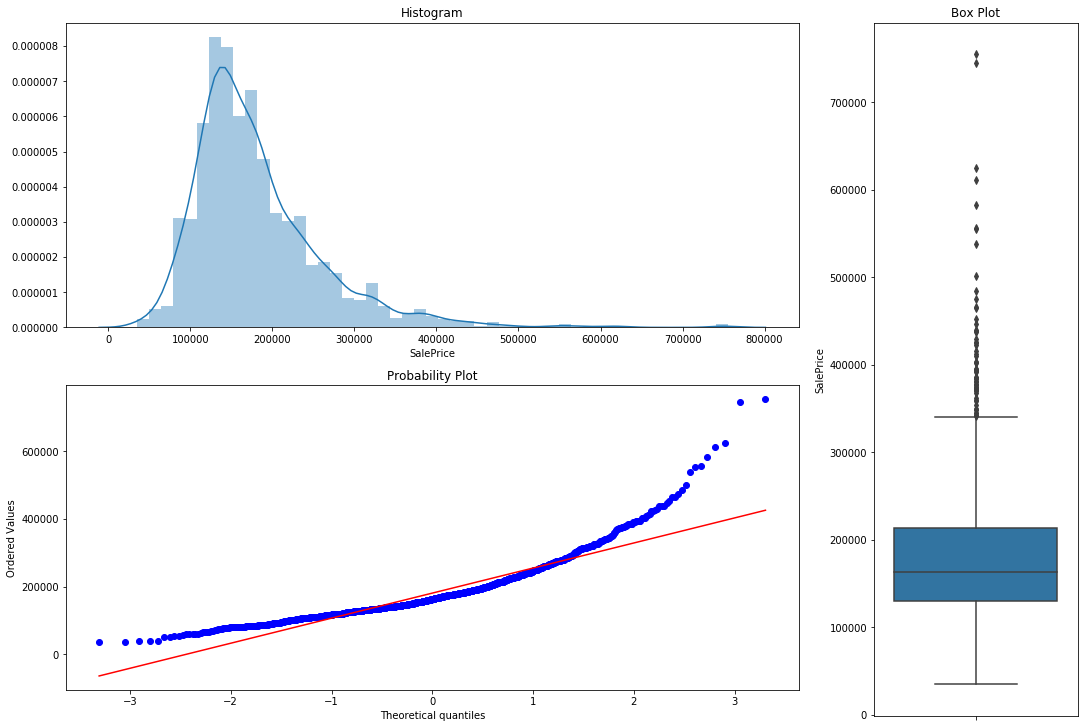

In [10]:
fig = plt.figure(constrained_layout=True, figsize=(15,10))
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#gs = fig3.add_gridspec(3, 3)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(train.SalePrice, norm_hist=True, ax = ax1)


ax2 = fig.add_subplot(grid[1, :2])
ax2.set_title('QQ_plot')
stats.probplot(train['SalePrice'], plot = ax2)


ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(train.SalePrice, orient='v', ax = ax3 );

used three different charts to check whether a variable is normally distributed or not. Here SalePrice is not normally distributed.
but target variable is right-skewed. Let's find out much it is right-skewed in terms of numbers.

In [11]:
#skewness and kurtosis
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


In [12]:
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
LotFrontage      0.123763
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

The above are predictor variables seen in a descending order starting with most correlated one OverallQual. Let's put this in scatter plot.

#### Saleprice vs Overallqual

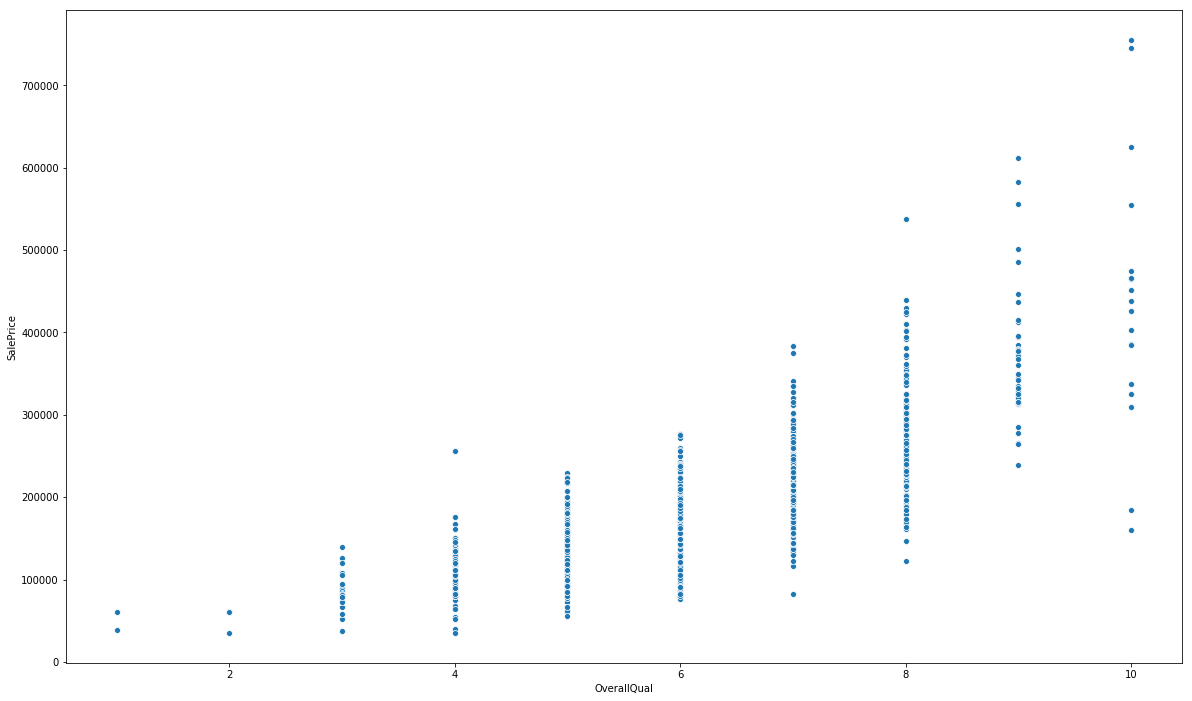

In [13]:
plt.subplots(figsize = (20,12))
sns.scatterplot(y = train.SalePrice, x = train.OverallQual);

by above plot this is categorical variable. However, it looks like some of houses are totally over priced compared to over all quality. These could be outliers ,lets check some more features to determine the outliers and now we will skip the categorical variables and only focus on truely numerical variables.

#### SalePrice vs GrLivArea

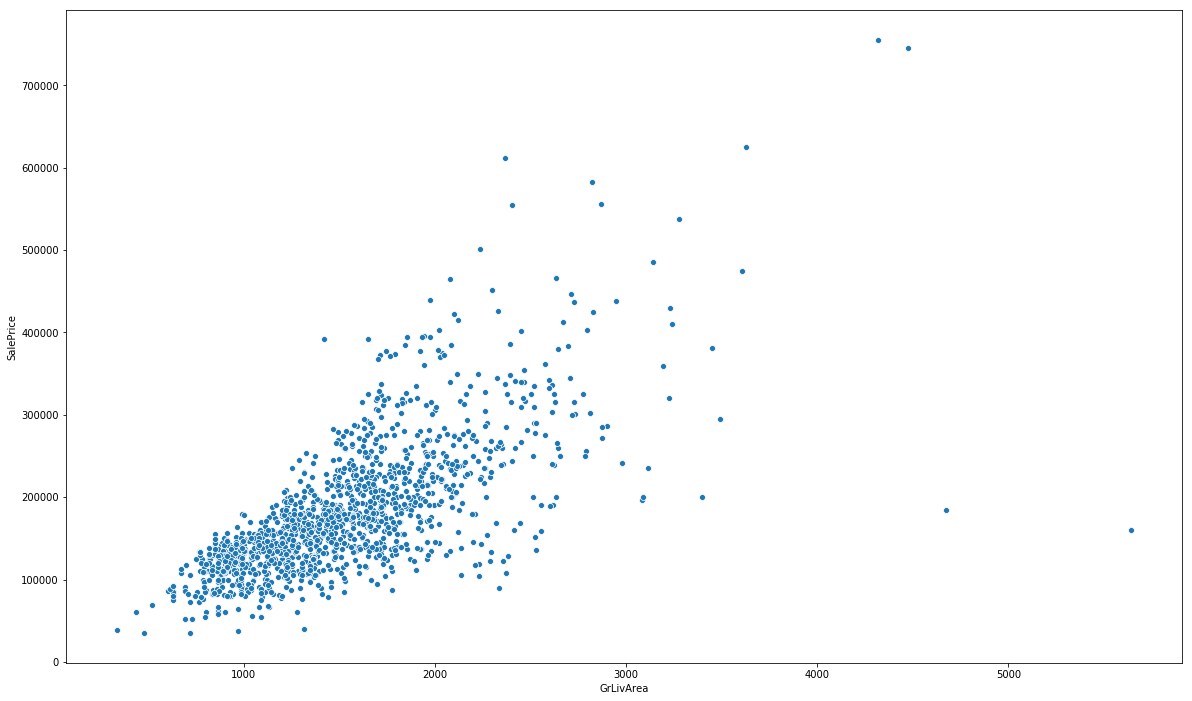

In [14]:
plt.subplots(figsize = (20,12))
sns.scatterplot(y = train.SalePrice, x = train.GrLivArea);

#### SalePrice vs GarageArea

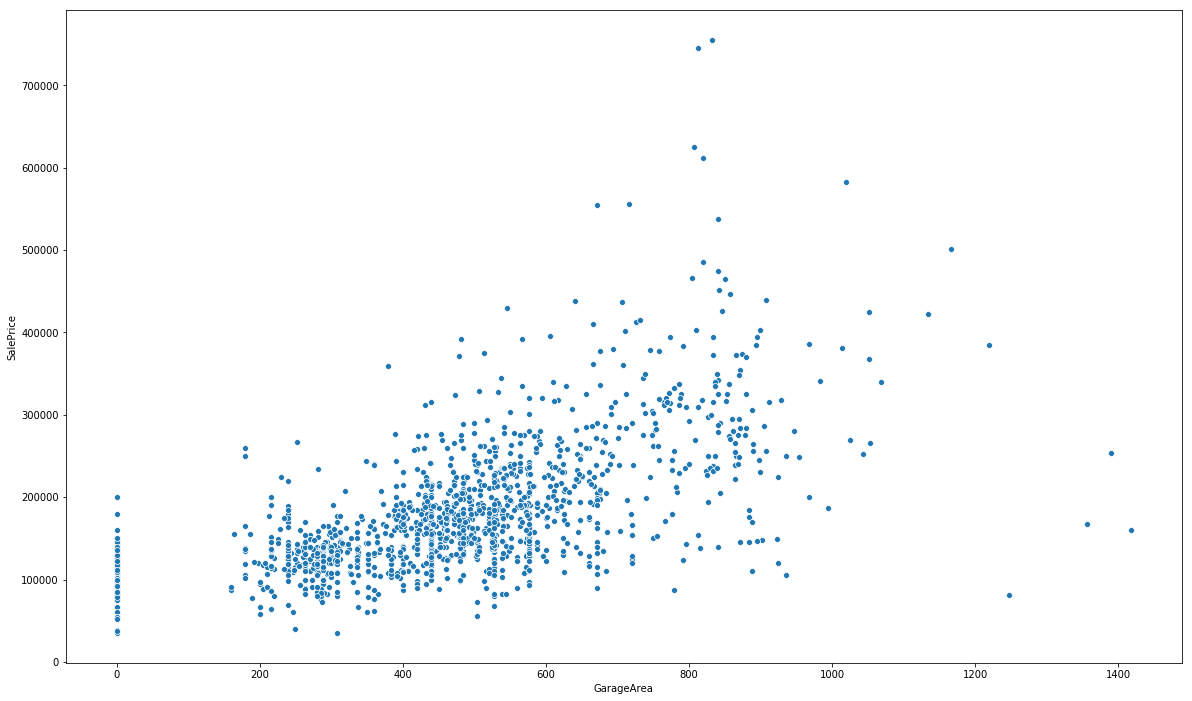

In [15]:
plt.subplots(figsize = (20,12))
sns.scatterplot(y = train.SalePrice, x = train.GarageArea);

#### SalePrice vs TotalBsmtSF

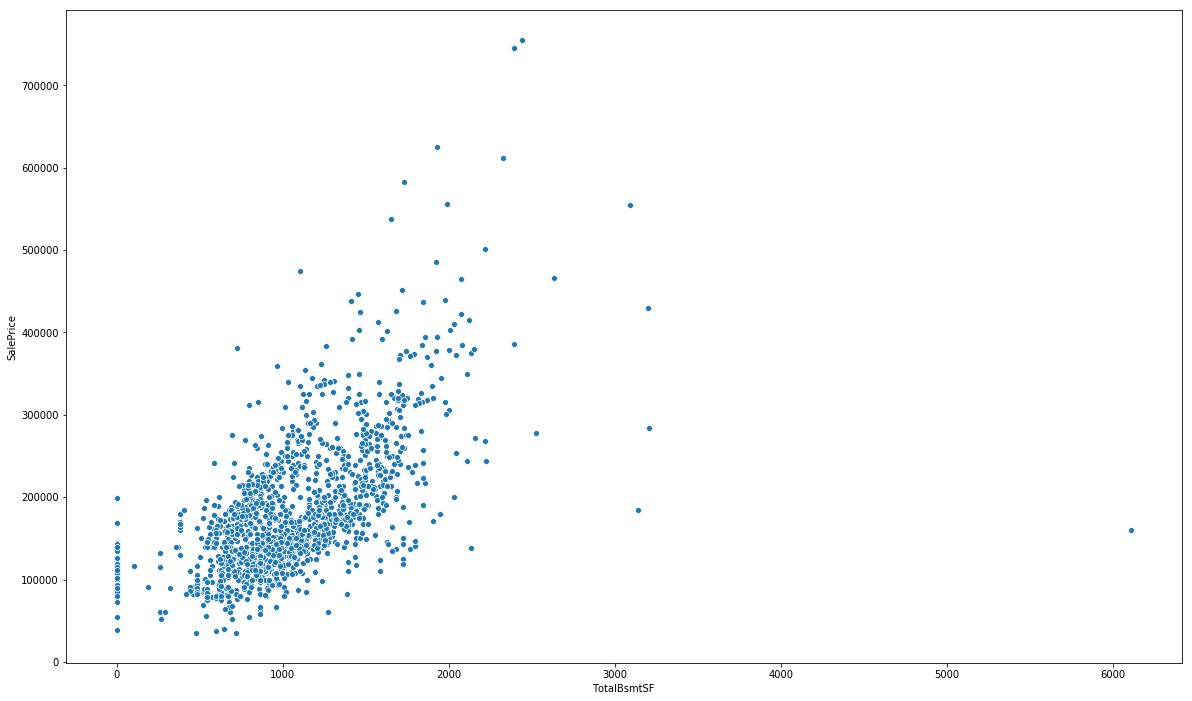

In [16]:
plt.subplots(figsize = (20,12))
sns.scatterplot(y = train.SalePrice, x = train.TotalBsmtSF);

#### SalePrice vs 1stFlrS

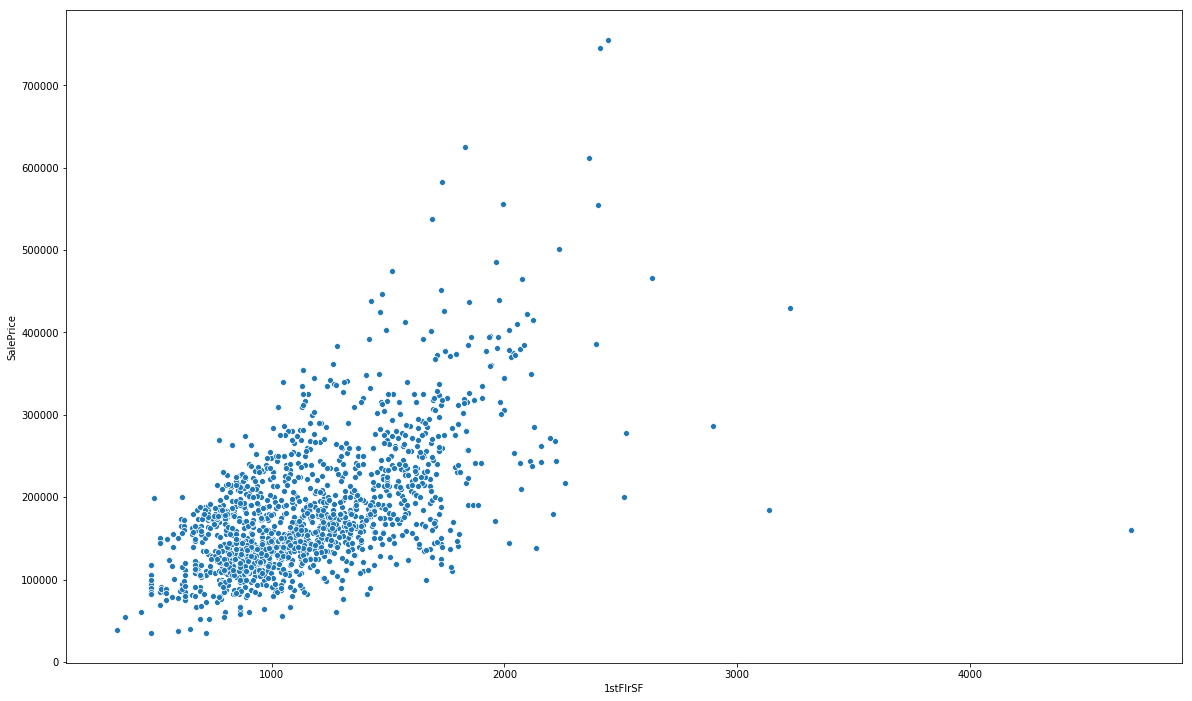

In [17]:
plt.subplots(figsize = (20,12))
sns.scatterplot(y = train.SalePrice, x = train['1stFlrSF'])

#### SalePrice vs MasVnrArea

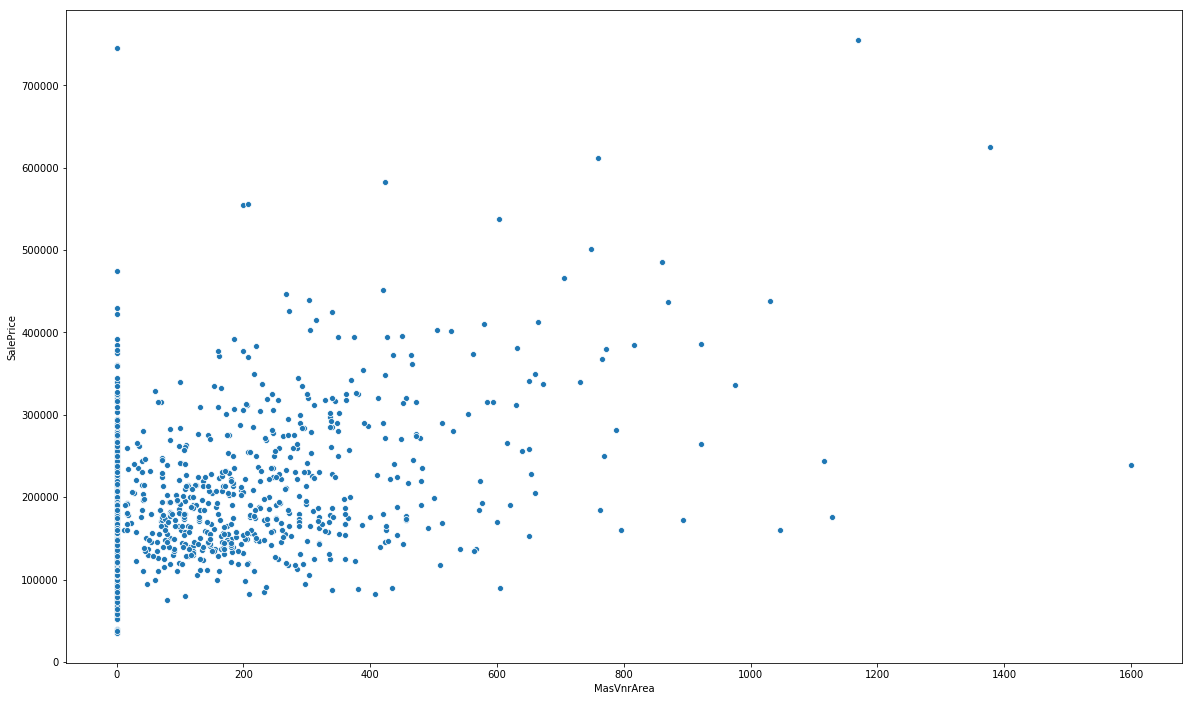

In [18]:
plt.subplots(figsize = (20,12))
sns.scatterplot(y = train.SalePrice, x = train.MasVnrArea );

Our target variable shows an unequal level of variance across a range of predictor(independent)variables.
There are multiple outliers in the scatter plots .

The next 2 to the top right edge of SalePrice vs GrLivArea seems to be follow in trend.

However, The 2 on the bottom right of the same chart not following any trends. We will get rid of these two.


In [19]:
## saving a copy of this dataset so that later on any changes can be compared side by side.
previous_train = train.copy()

## Deleting those two values with outliers. 
train.drop(index = train[(train.GrLivArea > 4000) & (train.SalePrice < 300000)].index.tolist(), inplace=True)

#### SalePrice vs GarageArea

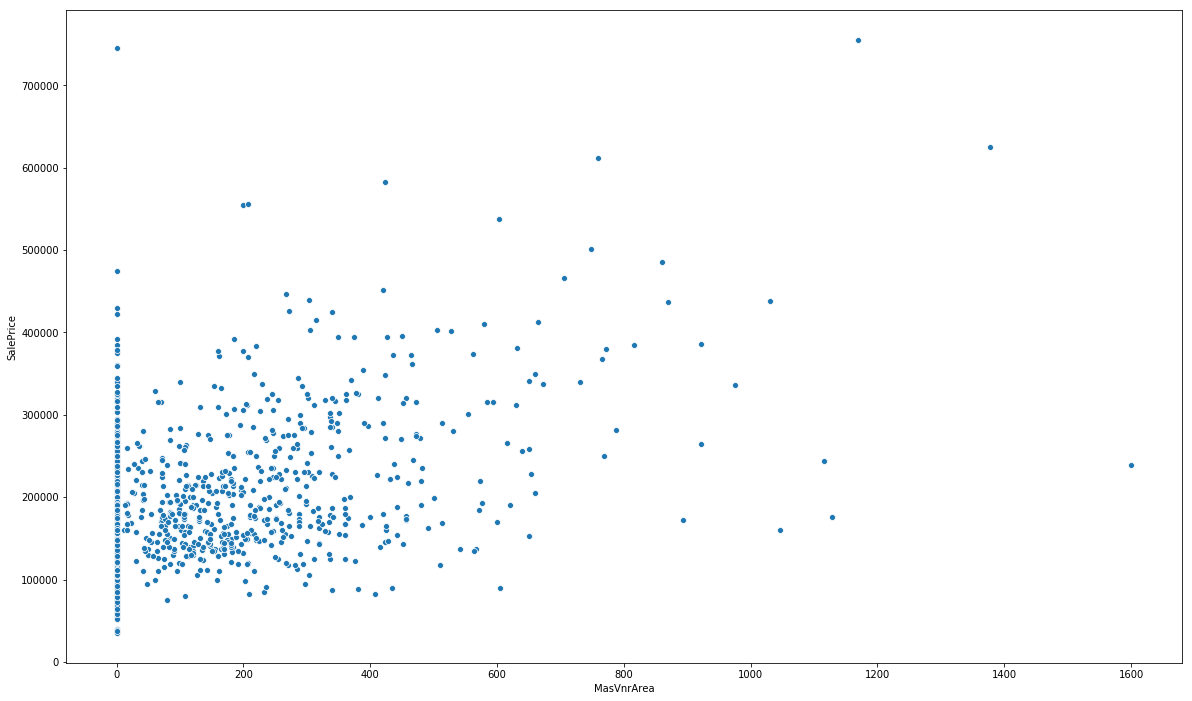

In [20]:
plt.subplots(figsize = (20,12))
sns.scatterplot(y = train.SalePrice, x = train.MasVnrArea);

We go through each feature and trying to check for the assumptions above

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



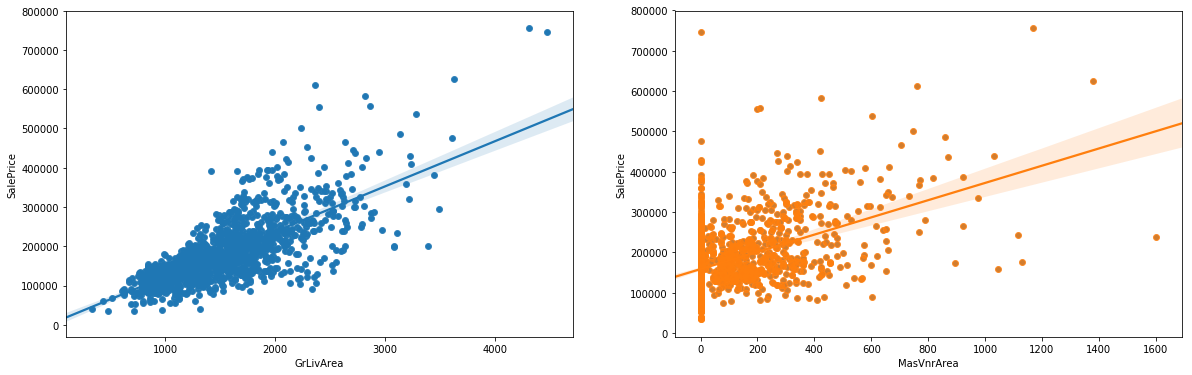

In [21]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,6), ncols=2,sharey=False)
sns.scatterplot( x = train.GrLivArea, y = train.SalePrice, ax=ax1)
sns.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

sns.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
sns.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2);

Here we are plotting our target variable with two independent variable "GrLivArea" and "MasVnrArea", which shows the better linear relationship between "SalePrice" and "GrLivArea" than "SalePrice" and "MasVnrArea".

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



mu = 180932.92 and sigma = 79467.79


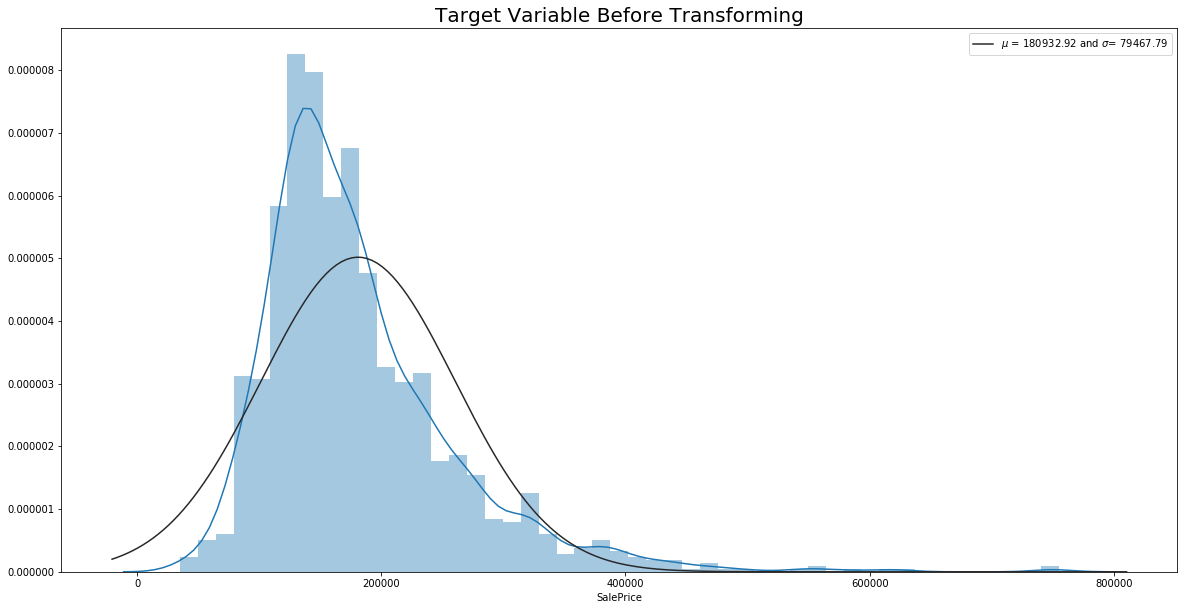

In [22]:
plt.subplots(figsize = (20,10))
from scipy.stats import norm
sns.distplot(train.SalePrice, fit =norm)
(mu, sigma) = norm.fit(train["SalePrice"])
print ('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
plt.legend(['$\mu$ = {:.2f} and $\sigma$= {:.2f}'.format(mu, sigma)], loc = 'best');
plt.title('Target Variable Before Transforming', fontsize = 20);

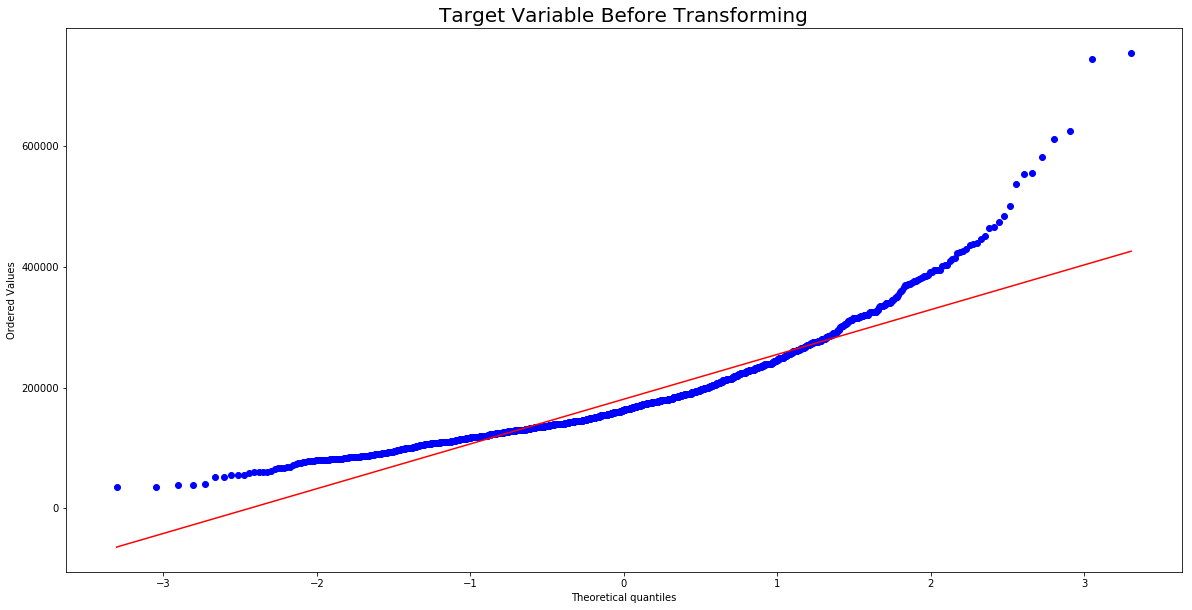

In [23]:
#qqplot
plt.subplots(figsize = (20,10))
stats.probplot(train['SalePrice'], plot = plt)
plt.title("Target Variable Before Transforming", fontsize = 20);

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



mu = 12.02 and sigma = 0.40 )


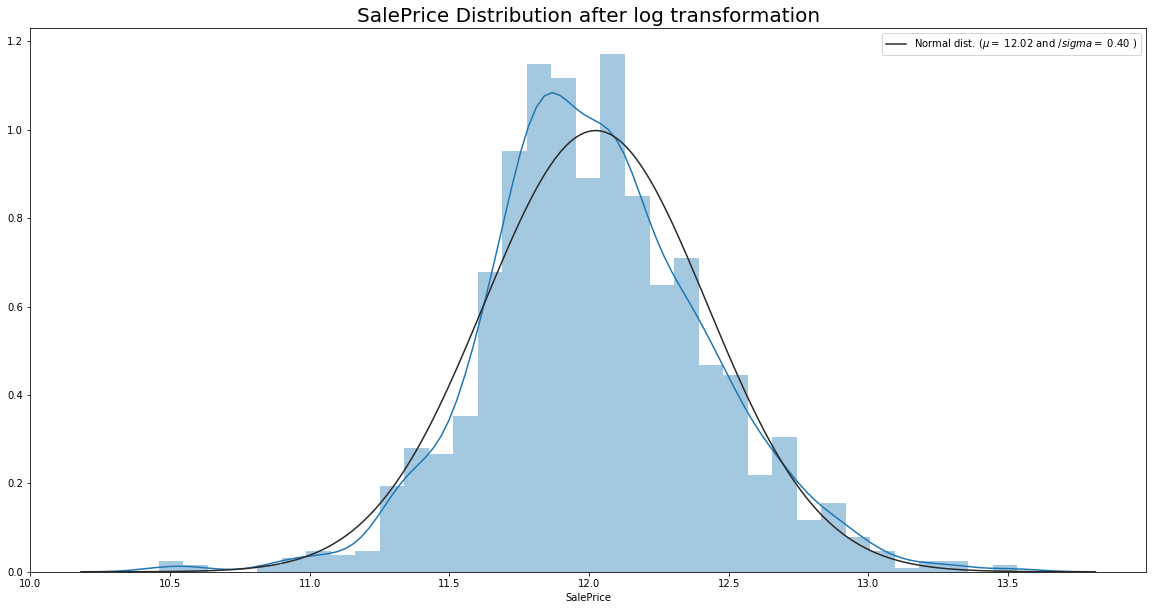

In [24]:
## Subplots
plt.subplots(figsize = (20,10))

## trainsforming target variable 
train["SalePrice"] = np.log1p(train["SalePrice"])

## plot distplot with transformed target variable. 
sns.distplot(train["SalePrice"], fit = norm)

## determining mean(mu) and sd(sigma)
(mu, sigma) = norm.fit(train["SalePrice"])

## Print mu and sigma. 
print ('mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma))

## give the chart legend, title. 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $/sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.title('SalePrice Distribution after log transformation', fontsize = 20);

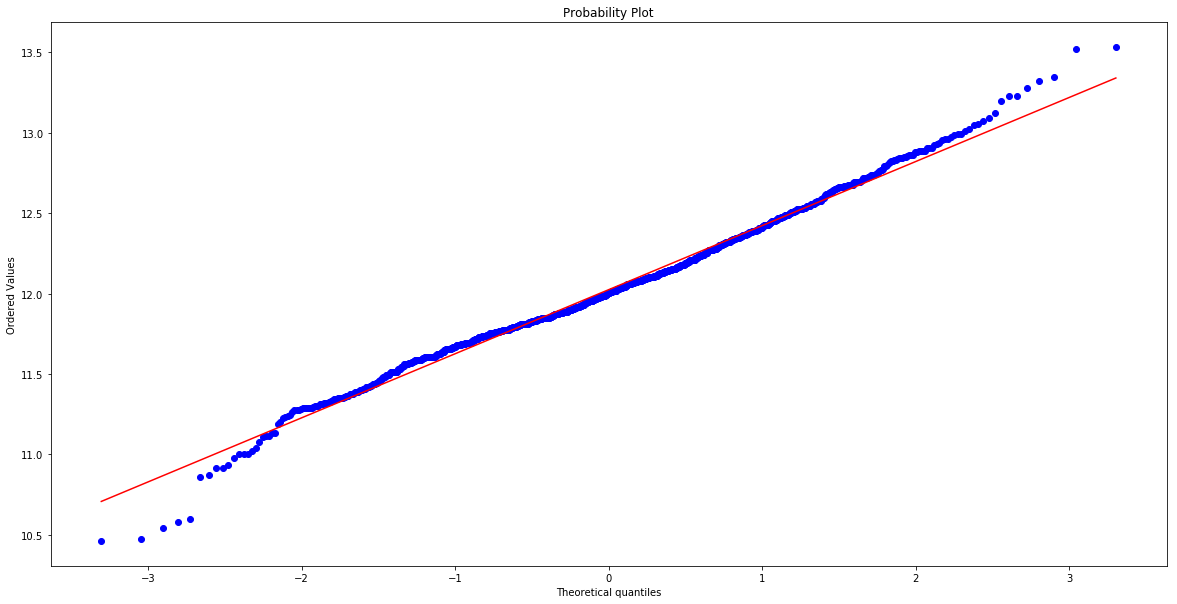

In [25]:
##QQ plots. 
plt.subplots(figsize = (20,10))
from scipy import stats
stats.probplot(train['SalePrice'], plot = plt)
plt.show()

C:\Users\ASHISH\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



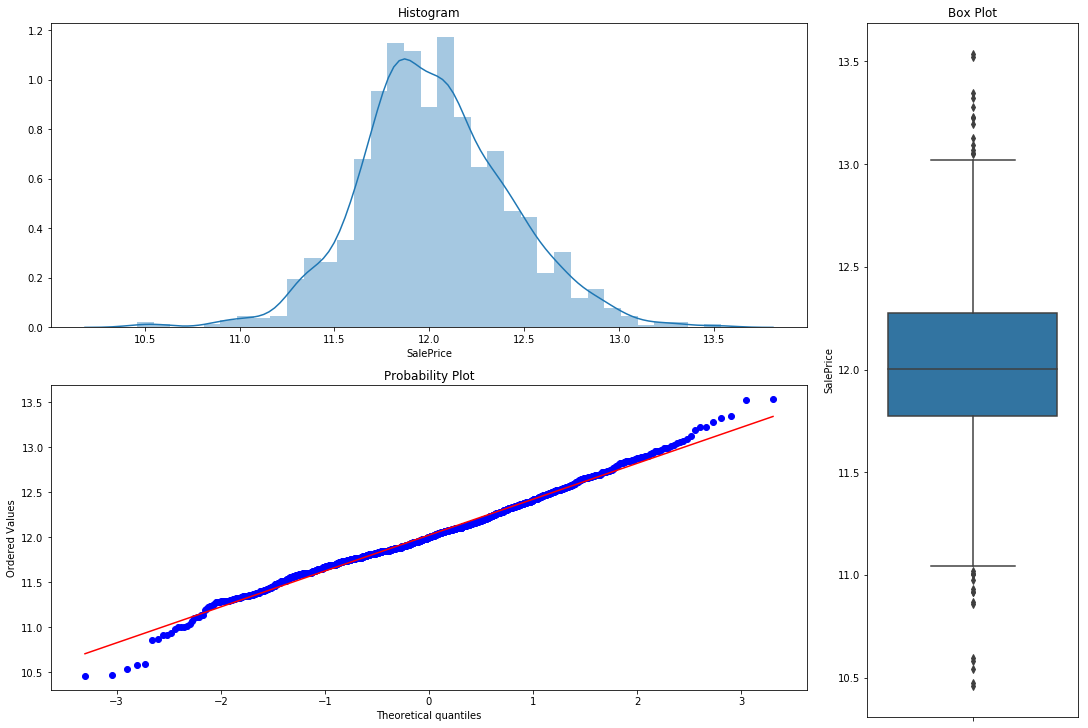

In [26]:
fig = plt.figure(constrained_layout=True, figsize=(15,10))
grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
#gs = fig3.add_gridspec(3, 3)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(train.SalePrice, norm_hist=True, ax = ax1)


ax2 = fig.add_subplot(grid[1, :2])
ax2.set_title('QQ_plot')
stats.probplot(train['SalePrice'], plot = ax2)


ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(train.SalePrice, orient='v', ax = ax3 );

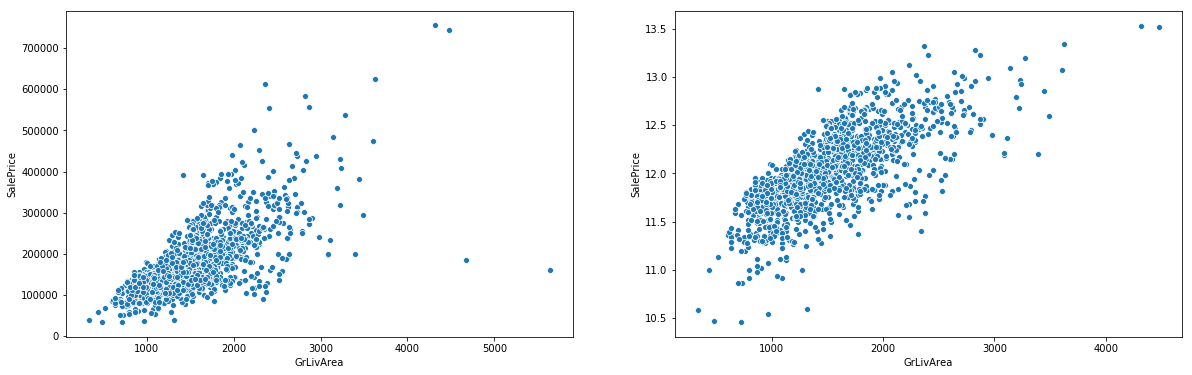

In [27]:
fig, (ax1, ax2) = plt.subplots(figsize = (20,6), ncols=2, sharey = False, sharex=False)
sns.scatterplot(x = previous_train.GrLivArea, y = previous_train.SalePrice, ax = ax1)

sns.scatterplot(x = train.GrLivArea, y = train.SalePrice, ax = ax2);

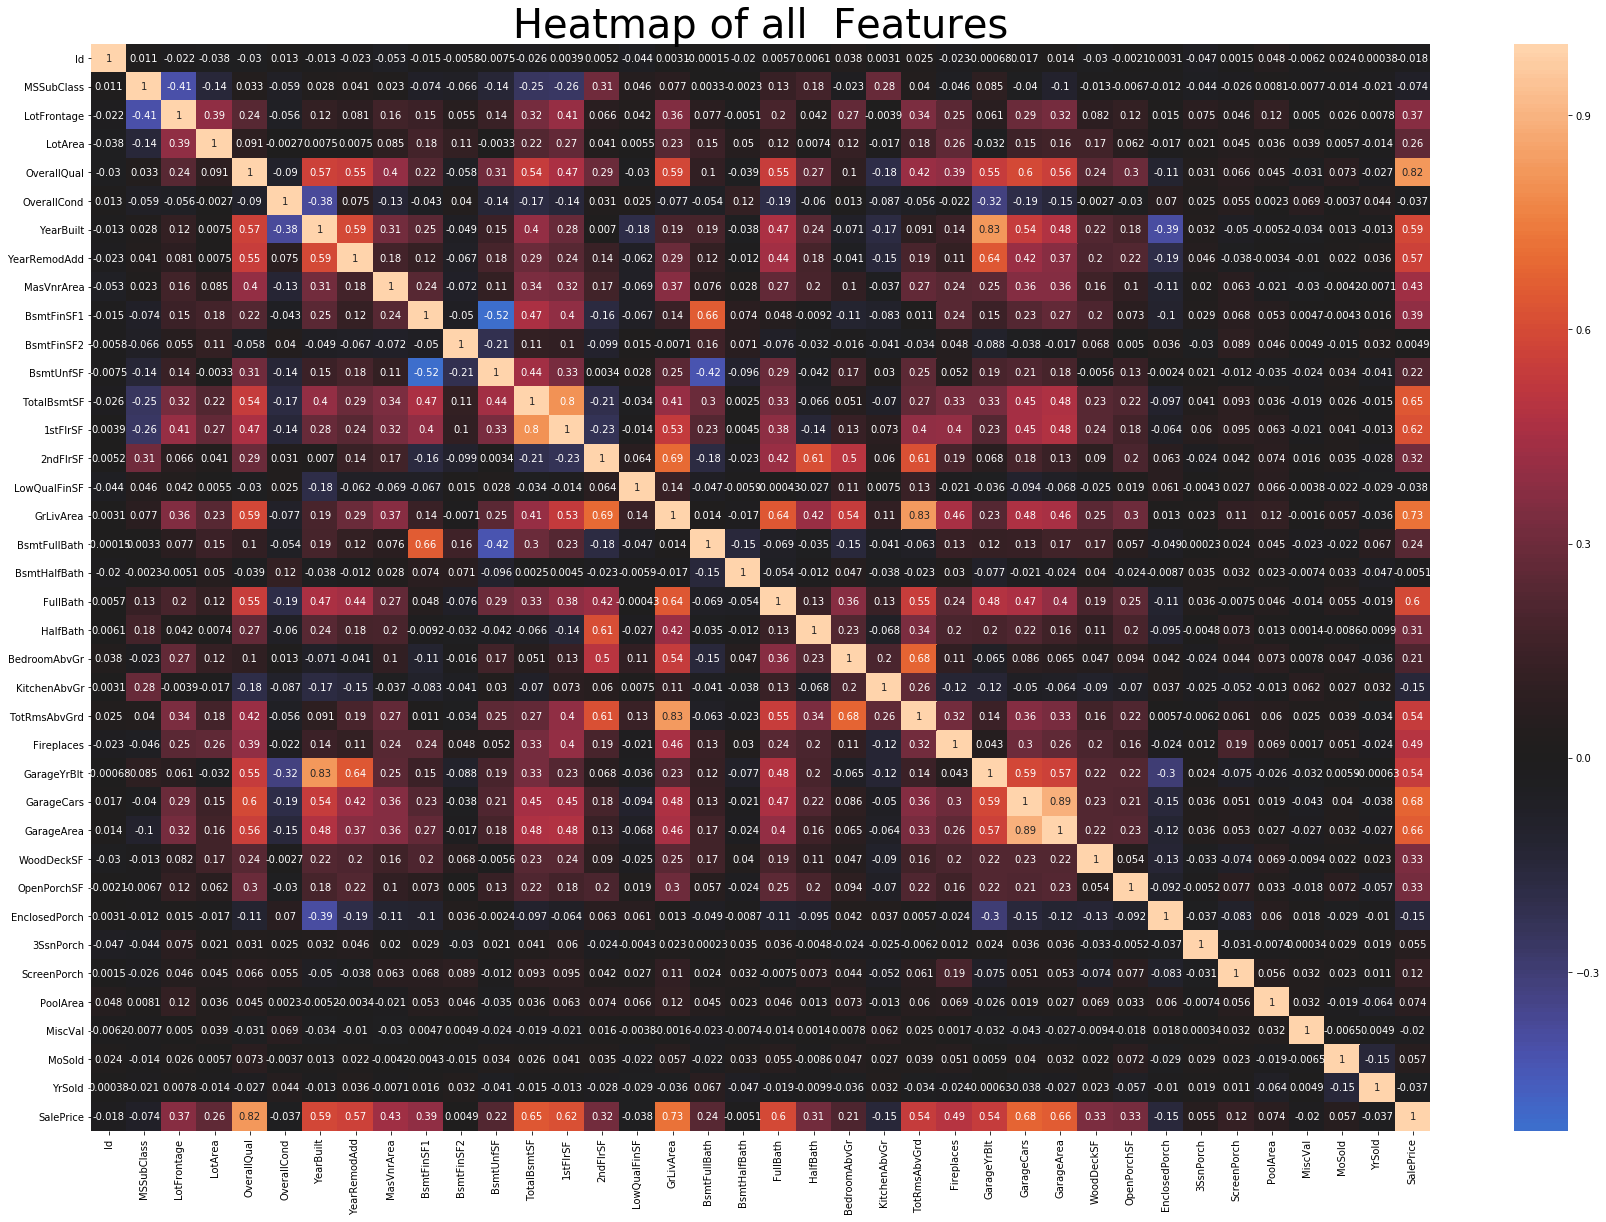

In [28]:
#Heatmap
plt.subplots(figsize = (30,20))
sns.heatmap(train.corr(),  annot=True, center = 0);
plt.title("Heatmap of all  Features", fontsize = 40);

## Feature Engineering

In [29]:
## save train and test id for later. 
train_id = train['Id']
test_id = test['Id']

## Drop"Id" from train and test. 
train.drop(columns=['Id'],axis=1, inplace=True)
test.drop(columns=['Id'],axis=1, inplace=True)

In [30]:
n_train = train.shape[0]
n_test = test.shape[0]

In [31]:
y_train = train.SalePrice.values

In [32]:
## Combining train and test data. 
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [33]:
## Combining train and test data  
all_data = pd.concat((train, test)).reset_index(drop = True)
all_data.drop(['SalePrice'], axis = 1, inplace = True)
"""## Removing the correlated features. 
train.drop(columns=["FullBath", "BsmtUnfSF", "GarageYrBlt"], axis=1, inplace=True)
train.drop(columns=["YearBuilt", "YearRemodAdd"], axis=1, inplace=True)
train.drop(columns=["1stFlrSF"], axis=1, inplace=True)
train.drop(columns=["BsmtFullBath"], axis=1, inplace=True)
train.drop(columns=["GarageCars"], axis=1, inplace=True)
train.drop(columns=["GrLivArea"], axis=1, inplace=True)
train.drop(columns=["GarageArea"], axis=1, inplace=True)
train.drop(columns=["HalfBath"], axis=1, inplace=True)
train.drop(columns=["TotRmsAbvGrd"], axis=1, inplace=True)
train.drop(columns=["BedroomAbvGr"], axis=1, inplace=True)
train.drop(columns=["TotalBsmtSF"], axis=1, inplace=True)
train.drop(columns=["Fireplaces"], axis=1, inplace=True)
train.drop(columns=["MSSubClass"], axis=1, inplace=True)
train.drop(columns=["2ndFlrSF"], axis=1, inplace=True)"""

C:\Users\ASHISH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




'## Removing the correlated features. \ntrain.drop(columns=["FullBath", "BsmtUnfSF", "GarageYrBlt"], axis=1, inplace=True)\ntrain.drop(columns=["YearBuilt", "YearRemodAdd"], axis=1, inplace=True)\ntrain.drop(columns=["1stFlrSF"], axis=1, inplace=True)\ntrain.drop(columns=["BsmtFullBath"], axis=1, inplace=True)\ntrain.drop(columns=["GarageCars"], axis=1, inplace=True)\ntrain.drop(columns=["GrLivArea"], axis=1, inplace=True)\ntrain.drop(columns=["GarageArea"], axis=1, inplace=True)\ntrain.drop(columns=["HalfBath"], axis=1, inplace=True)\ntrain.drop(columns=["TotRmsAbvGrd"], axis=1, inplace=True)\ntrain.drop(columns=["BedroomAbvGr"], axis=1, inplace=True)\ntrain.drop(columns=["TotalBsmtSF"], axis=1, inplace=True)\ntrain.drop(columns=["Fireplaces"], axis=1, inplace=True)\ntrain.drop(columns=["MSSubClass"], axis=1, inplace=True)\ntrain.drop(columns=["2ndFlrSF"], axis=1, inplace=True)'

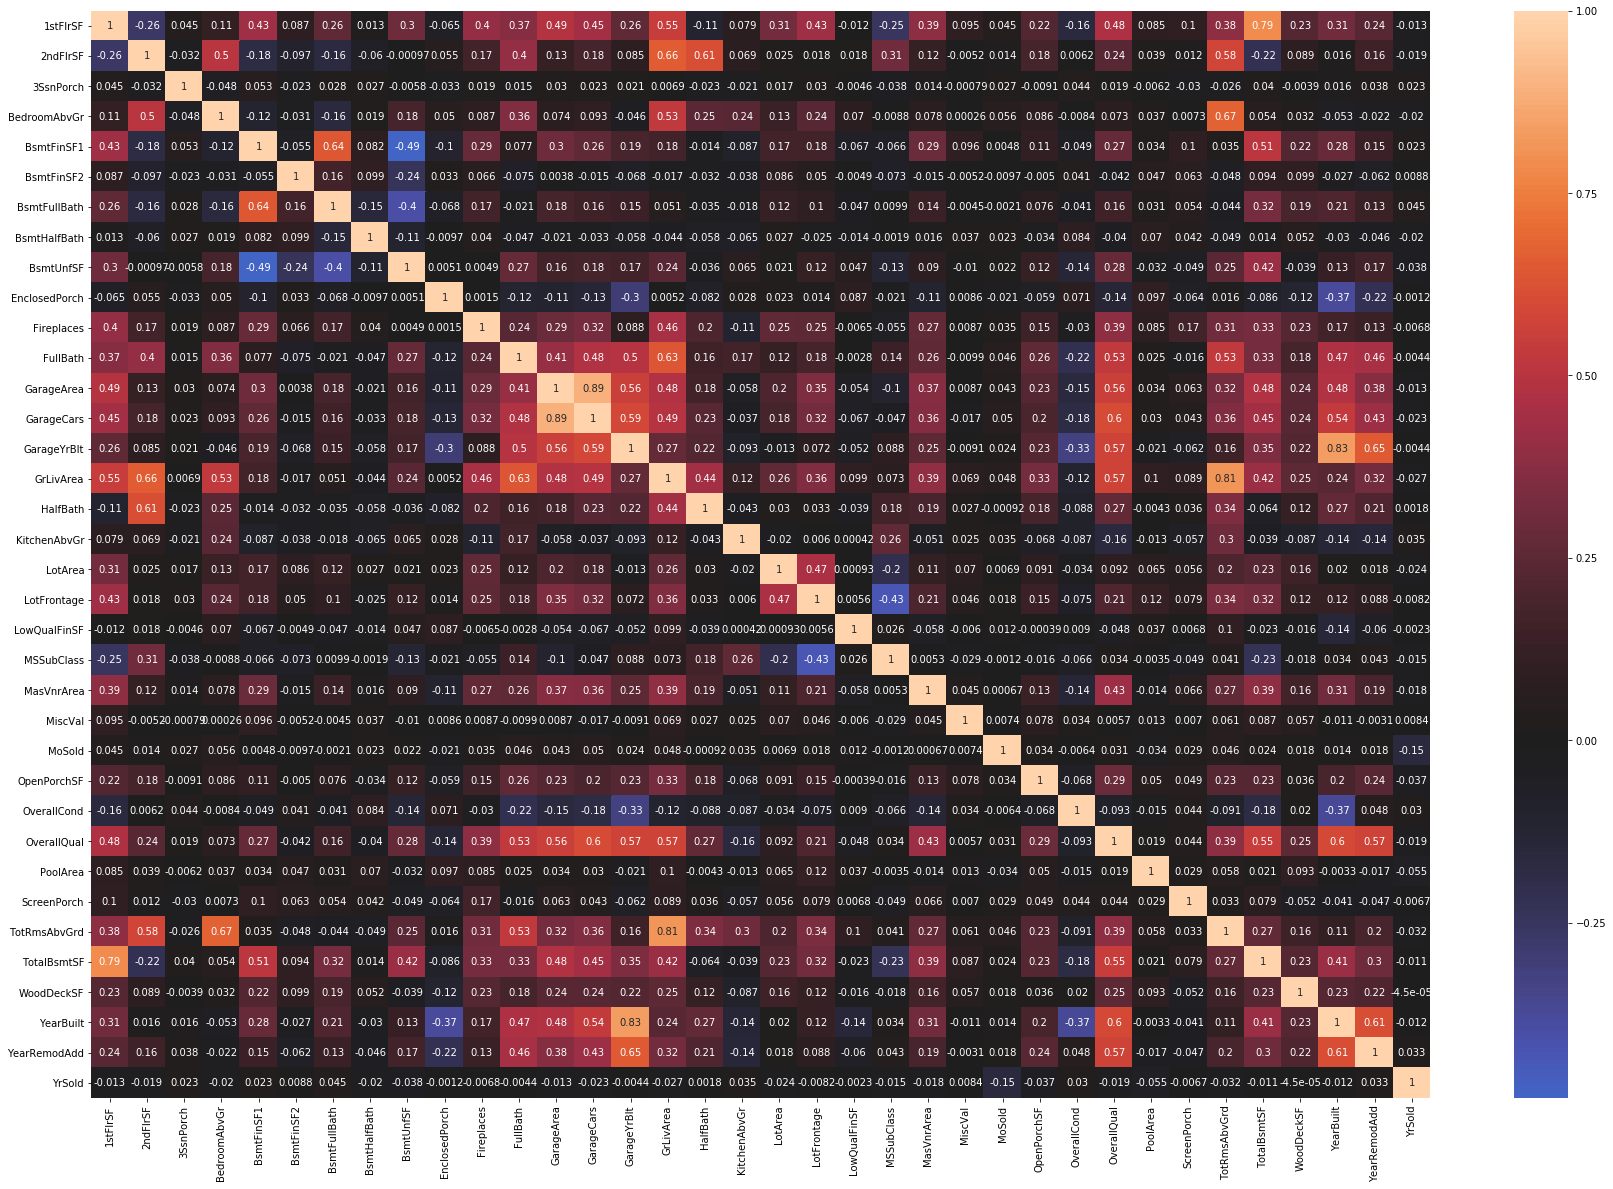

In [34]:
#heatmap
plt.subplots(figsize = (30,20))
sns.heatmap(all_data.corr(), annot=True, center = 0);

In [61]:
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(20)


Skew in numerical features: 



,Skew
PoolArea,15.759529
3SsnPorch,8.921650
LowQualFinSF,8.741030
MiscVal,5.594963
BsmtHalfBath,3.786685
KitchenAbvGr,3.697303
ScreenPorch,2.977052
BsmtFinSF2,2.563235
EnclosedPorch,2.024321
MasVnrArea,0.637388


In [37]:
#missing data in train and test
temp = pd.DataFrame(all_data.isnull().sum()[all_data.isnull().sum() != 0].sort_values(ascending = False),columns=["Total_missing"])
temp["Percent"] = round(temp.Total_missing/len(all_data)*100,2)
temp

,Total_missing,Percent
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageQual,159,5.45
GarageCond,159,5.45
GarageFinish,159,5.45
GarageYrBlt,159,5.45


In [38]:
##Impute missing values
missing_val_col = ["Alley", 
                   "PoolQC", 
                   "MiscFeature",
                   "Fence",
                   "FireplaceQu",
                   "GarageType",
                   "GarageFinish",
                   "GarageQual",
                   "GarageCond",
                   'BsmtQual',
                   'BsmtCond',
                   'BsmtExposure',
                   'BsmtFinType1',
                   'BsmtFinType2',
                   'MasVnrType']

for i in missing_val_col:
    all_data[i] = all_data[i].fillna('None')

In [39]:
missing_val_col2 = ['BsmtFinSF1',
                    'BsmtFinSF2',
                    'BsmtUnfSF',
                    'TotalBsmtSF',
                    'BsmtFullBath', 
                    'BsmtHalfBath', 
                    'GarageYrBlt',
                    'GarageArea',
                    'GarageCars',
                    'MasVnrArea']

for i in missing_val_col2:
    all_data[i] = all_data[i].fillna(0)

In [40]:
#create new features from other
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [41]:
missing_val_col3 = ['MSZoning','Utilities','Functional', 'SaleType','KitchenQual','Exterior2nd','Exterior1st','Electrical']

for i in missing_val_col3:
    all_data[i] = all_data[i].fillna(all_data[i].mode()[0])

In [42]:
temp = pd.DataFrame(all_data.isnull().sum()[all_data.isnull().sum() != 0].sort_values(ascending = False),columns=["Total_missing"])
temp["Percent"] = round(temp.Total_missing/len(all_data)*100,2)
temp

,Total_missing,Percent


Some of the variables are in the num format even though it is categorical variables. so, convert datatype from int to str.

In [43]:
## the "Over all Condition" and "Over all Quality" of the house. 
all_data['OverallCond'] = all_data['OverallCond'].astype(str) 
all_data['OverallQual'] = all_data['OverallQual'].astype(str)

## Imp. years and months should be categorical variables. 
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)
all_data['YearRemodAdd'] = all_data['YearRemodAdd'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str) 
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)

## Zoning class are given in num; converting to categorical variables. 
all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

In [44]:
# Adding total sqfootage
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [45]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [46]:
print("Number of skewed numerical features to Box Cox transform : {}".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

Number of skewed numerical features to Box Cox transform : 29


In [47]:
#create dummy var
all_data = pd.get_dummies(all_data, drop_first=True)

In [48]:
# modified train and test .
train = all_data[:n_train]
test = all_data[n_train:]

### Train_test split

In [55]:
train_x, test_x, train_y, test_y = train_test_split(train, y_train,test_size = .3, random_state = 100)

In [56]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(1020, 578)
(1020,)
(438, 578)
(438,)


### Modelling

In [57]:
#linear regression model 
lin_reg = LinearRegression()

In [58]:
## fitting train and test. 
lin_reg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Predicting test data. 

In [59]:
y_pred = lin_reg.predict(test_x)
y_pred

array([11.95740193, 12.64483889, 12.60859967, 11.82611903, 12.21204282,
       11.6742811 , 11.69352314, 11.75201182, 11.68703701, 12.06538014,
       11.73439345, 11.73611231, 11.97822632, 11.80920575, 11.63694273,
       11.1735397 , 12.12375057, 12.32549161, 12.4250608 , 11.98835111,
       11.77398607, 12.48587765, 12.19422382, 11.64505946, 12.8129974 ,
       12.18556771, 12.06187051, 11.56078054, 12.06472151, 12.17971587,
       12.31351068, 12.16619815, 11.91684268, 11.58765968, 11.85193875,
       12.37763633, 12.15196208, 12.49949003, 11.84556543, 11.32794366,
       11.62260254, 11.85027863, 12.51905314, 12.19680965, 11.75528869,
       11.51457585, 11.59295957, 11.99147646, 11.81109628, 11.76164674,
       11.67927938, 12.01059406, 11.55717131, 12.6254272 , 11.79056186,
       12.61792099, 11.81680715, 12.32166807, 12.36381204, 11.71134715,
       12.27985277, 11.89057431, 11.73999718, 12.44905123, 12.74869803,
       12.35170166, 12.28721322, 11.69839038, 12.07916525, 11.35

In [60]:
## Mean squared error(MSE)  
mean_squared_error(test_y, y_pred)

0.04419462499096327